#K-Means Clustering

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

##Clustering Algorithm

In [ ]:
cluster_count=3

(75, 2)


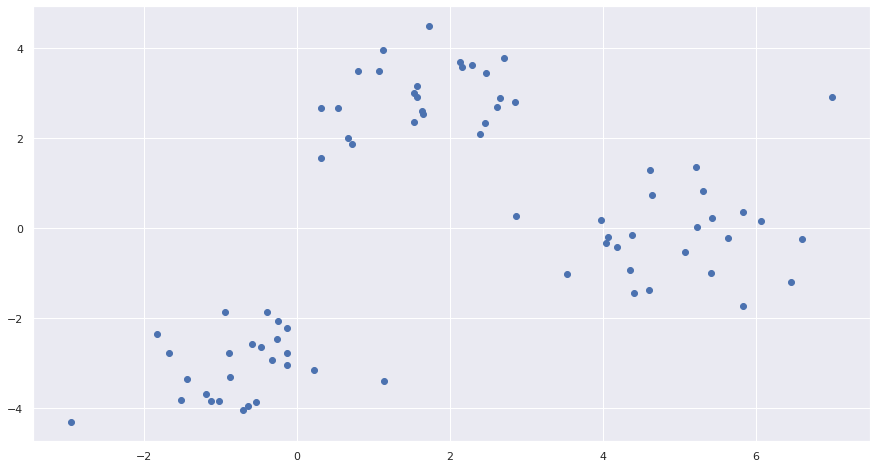

In [ ]:
rng=np.random.default_rng(seed=42)
mu_1,mu_2,mu_3=np.array([-1,-3]),np.array([2,3]), np.array([5,0])
sigma=np.eye(2)
plt.figure(figsize=(15,8))
n=25
x_1=rng.multivariate_normal(mu_1,sigma,n)
x_2=rng.multivariate_normal(mu_2,sigma,n)
x_3=rng.multivariate_normal(mu_3,sigma,n)
X=np.concatenate((x_1,x_2,x_3),axis=0)
rng.shuffle(X)

print(X.shape)
plt.scatter(X[:,0],X[:,1])

**Algorithm:**
1. Randomly initialize k centroids. Note that each centroid is a vector in m dimensional space
2. Repeat until convergence:

  (2a) Assign points to the closest centroids.

  (2b) Calculate the centroids based on the points assigned to the cluster

The algorithm converges when the centroid stops changing or in other words the cluster membership stabilizes and subsequent iterations do not yield any changes.



In [ ]:
def fit(X,k):
  #take three random points from dataset and take them as initial centroids
  print(X)
  centroids = X[np.random.randint(0,X.shape[0],size=k)]

  #calculate initial label of each data point. This label will correspind to 0 to k-1
  labels = np.argmin(cdist(X,centroids),axis=1)
  print(labels)

  for _iteration in range(10):
    #copy labels for all points for comparing later
    previous_labels=labels.copy()

    #compute new centroids
    centroids=np.array([np.mean(X[labels==r], axis=0) for r in range(k)])
    print(centroids)
    #at last recalculate label of each data point
    labels=np.argmin(cdist(X,centroids),axis=1)

    #check if labels of points are not changing
    if all(labels==previous_labels):
      break
  return centroids, labels

In [ ]:
centroids, labels=fit(X,cluster_count)

In [ ]:
print("Centroids: ",centroids)

Centroids:  [[-0.7407427  -3.07683524]
 [ 1.66430625  2.95219325]
 [ 4.99329388 -0.09575182]]


In [ ]:
def plot_kmeans(X, centroids, labels, rseed=0, ax=None):
  #plot the input data
  ax=ax or plt.gca()
  ax.axis('equal')

  #plot the data points
  ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='plasma',zorder=2)

  #plot the representations of the KMeans model
  radii = [cdist(X[labels==i], [center]).max()
          for i, center in enumerate(centroids)]
  for c, r in zip(centroids, radii):
    #add circular shapes to the clusters
    ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=5,alpha=0.5,zorder=1))

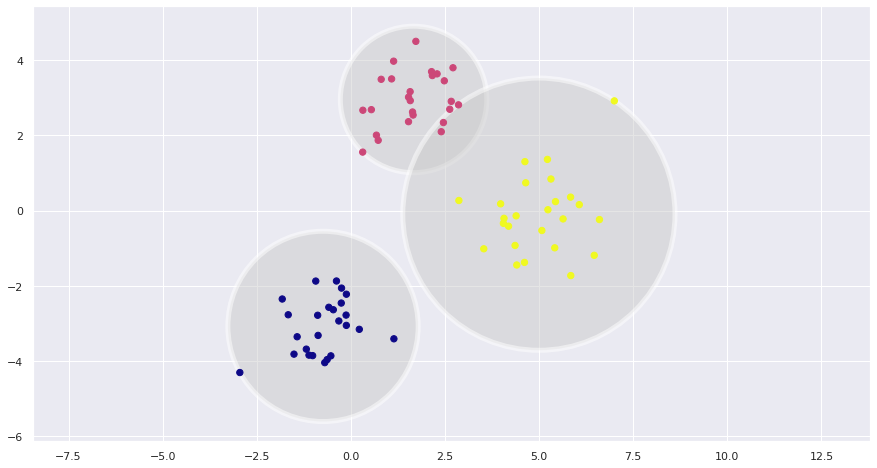

In [ ]:
plt.figure(figsize=(15,8))
plot_kmeans(X,centroids, labels)

**Exercise**: 

1. Implement **elbow method** for finding optimal k. 
2. Implement **Silhoutte** for finding optimal k.

#Graded Asssignment

Write a function to centroid(a,b) to find centroid of vectors a and b.

Input: a and b are numpy arrays of same shape.
Output: centroid of a and b as numpy array

In [ ]:
def centroid(a,b):
  c=[]
  count=a.shape[0]
  for i in range(count):
    c.append((a[i]+b[i])/2)
  return np.array(c)

In [ ]:
def silhoutte(a,b):
  s=(a-b)/max(a,b)
  return s